# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**


In this Jupyter notebook, I will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [ ]:
%%bash
add-apt-repository ppa:ubuntu-toolchain-r/test
apt-get update --fix-missing
apt-get dist-upgrade
wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
chmod +x Miniconda3-latest-Linux-x86_64.sh
./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
conda config --set always_yes yes --set changeps1 no
conda install -q -y -c conda-forge python=3.7
conda install -q -y -c conda-forge rdkit

Error: must run as root
Reading package lists...


E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
W: Problem unlinking the file /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permission denied)
W: Problem unlinking the file /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permission denied)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
--2024-07-03 16:03:32--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.176.84, 104.18.177.84, 2606:4700::6812:b154, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.176.84|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2024-07-03 16:03:32--  https://repo.anaconda.com/mini

In [1]:
import subprocess

# Add Miniconda to system PATH
subprocess.run('setx /M PATH "%PATH%;C:\\Users\\your-username\\Miniconda3\\Scripts;C:\\Users\\your-username\\Miniconda3"', shell=True)

# Download Miniconda installer
subprocess.run('curl -o Miniconda3-latest-Windows-x86_64.exe https://repo.anaconda.com/miniconda/Miniconda3-latest-Windows-x86_64.exe', shell=True)

# Run the Miniconda installer with batch mode
subprocess.run('start /wait "" Miniconda3-latest-Windows-x86_64.exe /InstallationType=JustMe /RegisterPython=0 /S /D=C:\\Users\\your-username\\Miniconda3', shell=True)

# Activate the conda environment
subprocess.run('call C:\\Users\\your-username\\Miniconda3\\Scripts\\activate.bat', shell=True)

# Configure Conda
subprocess.run('conda config --set always_yes yes --set changeps1 no', shell=True)

# Install Python 3.7 from conda-forge channel
subprocess.run('conda install -q -y -c conda-forge python=3.7', shell=True)

# Install RDKit from conda-forge channel
subprocess.run('conda install -q -y -c conda-forge rdkit', shell=True)

CompletedProcess(args='conda install -q -y -c conda-forge rdkit', returncode=0)

In [4]:
!pip show rdkit


Name: rdkit
Version: 2024.3.4
Summary: A collection of cheminformatics and machine-learning software written in C++ and Python
Home-page: 
Author: 
Author-email: Greg Landrum <greg.landrum@gmail.com>
License: BSD-3-Clause
Location: C:\Users\Mychael\anaconda3\Lib\site-packages
Requires: 
Required-by: 


## **Load bioactivity data**

In [7]:
import pandas as pd

In [8]:
from google.colab import files


uploaded = files.upload()


Saving aromatase_03_bioactivity_data_curated.csv to aromatase_03_bioactivity_data_curated.csv


In [9]:
df = pd.read_csv('aromatase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
...,...,...,...,...
2592,CHEMBL5285636,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,13.0,active
2593,CHEMBL5266533,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1,13.0,active
2594,CHEMBL5278229,COc1ccc(C(=O)c2ccc(Cn3ccnc3)cc2)cc1,237.8,active
2595,CHEMBL5275747,O=C(c1ccc(O)cc1)c1ccc(Cn2ccnc2)cc1,1100.0,intermediate


In [10]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [11]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [12]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL341591,7100.0,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12
1,CHEMBL2111947,50000.0,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...
2,CHEMBL431859,238.0,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21
3,CHEMBL113637,57.0,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21
4,CHEMBL112021,54.0,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21
...,...,...,...,...
2592,CHEMBL5285636,13.0,active,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1
2593,CHEMBL5266533,13.0,active,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1
2594,CHEMBL5278229,237.8,active,COc1ccc(C(=O)c2ccc(Cn3ccnc3)cc2)cc1
2595,CHEMBL5275747,1100.0,intermediate,O=C(c1ccc(O)cc1)c1ccc(Cn2ccnc2)cc1


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [4]:
import sys
sys.path.append('/usr/local/lib/python3.12/site-packages/')

try:
  from rdkit import Chem
  from rdkit.Chem.Draw import IPythonConsole
except ImportError:
  print('Stopping RUNTIME. Colaboratory will restart automatically. Please run again.')
  exit()

In [6]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

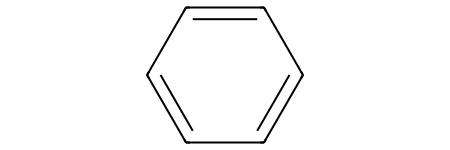

In [5]:
Chem.MolFromSmiles('c1ccccc1')

### **Calculate descriptors**

In [13]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [14]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2592,292.338,3.17100,0.0,4.0
2593,278.311,2.86800,1.0,4.0
2594,292.338,3.17100,0.0,4.0
2595,278.311,2.86800,1.0,4.0


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [15]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2592,292.338,3.17100,0.0,4.0
2593,278.311,2.86800,1.0,4.0
2594,292.338,3.17100,0.0,4.0
2595,278.311,2.86800,1.0,4.0


In [16]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active
...,...,...,...,...
2592,CHEMBL5285636,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,13.0,active
2593,CHEMBL5266533,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1,13.0,active
2594,CHEMBL5278229,COc1ccc(C(=O)c2ccc(Cn3ccnc3)cc2)cc1,237.8,active
2595,CHEMBL5275747,O=C(c1ccc(O)cc1)c1ccc(Cn2ccnc2)cc1,1100.0,intermediate


Now, let's combine the 2 DataFrame

In [17]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [18]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0,intermediate,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0,inactive,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0,active,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0,active,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0,active,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
2592,CHEMBL5285636,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,13.0,active,292.338,3.17100,0.0,4.0
2593,CHEMBL5266533,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1,13.0,active,278.311,2.86800,1.0,4.0
2594,CHEMBL5278229,COc1ccc(C(=O)c2ccc(Cn3ccnc3)cc2)cc1,237.8,active,292.338,3.17100,0.0,4.0
2595,CHEMBL5275747,O=C(c1ccc(O)cc1)c1ccc(Cn2ccnc2)cc1,1100.0,intermediate,278.311,2.86800,1.0,4.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [43]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [20]:
df_combined.standard_value.describe()

count    2.597000e+03
mean     1.801579e+04
std      8.002271e+04
min      0.000000e+00
25%      1.600000e+02
50%      1.320000e+03
75%      8.900000e+03
max      2.398833e+06
Name: standard_value, dtype: float64

In [21]:
-np.log10( (10**-9)* 100000000 )

1.0

In [22]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [27]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [28]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,54.0
...,...,...,...,...,...,...,...,...
2592,CHEMBL5285636,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,active,292.338,3.17100,0.0,4.0,13.0
2593,CHEMBL5266533,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1,active,278.311,2.86800,1.0,4.0,13.0
2594,CHEMBL5278229,COc1ccc(C(=O)c2ccc(Cn3ccnc3)cc2)cc1,active,292.338,3.17100,0.0,4.0,237.8
2595,CHEMBL5275747,O=C(c1ccc(O)cc1)c1ccc(Cn2ccnc2)cc1,intermediate,278.311,2.86800,1.0,4.0,1100.0


In [29]:
df_norm.standard_value_norm.describe()

count    2.597000e+03
mean     1.801579e+04
std      8.002271e+04
min      0.000000e+00
25%      1.600000e+02
50%      1.320000e+03
75%      8.900000e+03
max      2.398833e+06
Name: standard_value_norm, dtype: float64

In [44]:
df_final = pIC50(df_norm)
df_final

<ipython-input-43-14e0ebee44d0>:10: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...
2592,CHEMBL5285636,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,active,292.338,3.17100,0.0,4.0,7.886057
2593,CHEMBL5266533,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1,active,278.311,2.86800,1.0,4.0,7.886057
2594,CHEMBL5278229,COc1ccc(C(=O)c2ccc(Cn3ccnc3)cc2)cc1,active,292.338,3.17100,0.0,4.0,6.623788
2595,CHEMBL5275747,O=C(c1ccc(O)cc1)c1ccc(Cn2ccnc2)cc1,intermediate,278.311,2.86800,1.0,4.0,5.958607


In [46]:
df_final.pIC50.describe()

count    2597.000000
mean             inf
std              NaN
min         2.620000
25%         5.050610
50%         5.879426
75%         6.795880
max              inf
Name: pIC50, dtype: float64

Correcting the inf and NaN values in df_final.pIc50 since; It's important to note that the presence of infinite values (inf) can significantly impact the statistics. For instance, the mean and standard deviation are both affected by these outliers.

In [52]:
# prompt: create a code to correct the inf and NaN values in df_final.pIc50

import numpy as np

df_final['pIC50'] = np.where(np.isinf(df_final['pIC50']), np.nan, df_final['pIC50'])
df_final = df_final.dropna()


In [53]:
df_final.pIC50.describe()

count    2596.000000
mean        6.005234
std         1.283431
min         2.620000
25%         5.050610
50%         5.879426
75%         6.795880
max        10.823909
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [54]:
df_final.to_csv('aromatase_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [55]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...
2590,CHEMBL5274084,CCCCCOc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,active,348.446,4.73140,0.0,4.0,7.376751
2591,CHEMBL5284760,CCCOc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,active,320.392,3.95120,0.0,4.0,8.698970
2592,CHEMBL5285636,COc1ccc(C(=O)c2cccc(Cn3ccnc3)c2)cc1,active,292.338,3.17100,0.0,4.0,7.886057
2593,CHEMBL5266533,O=C(c1ccc(O)cc1)c1cccc(Cn2ccnc2)c1,active,278.311,2.86800,1.0,4.0,7.886057


Let's write this to CSV file.

In [57]:
df_2class.to_csv('aromatase_05_bioactivity_data_2class_pIC50.csv')

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [58]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

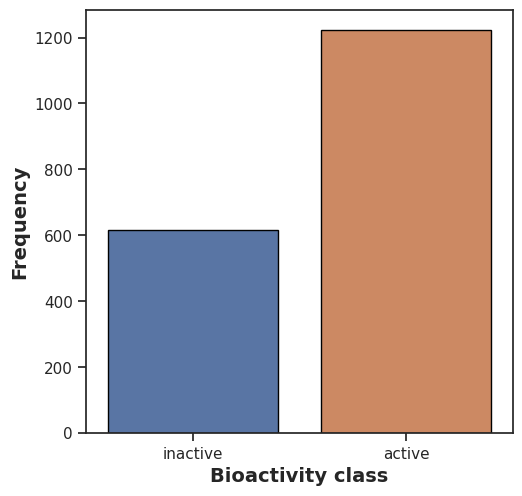

In [64]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black', hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

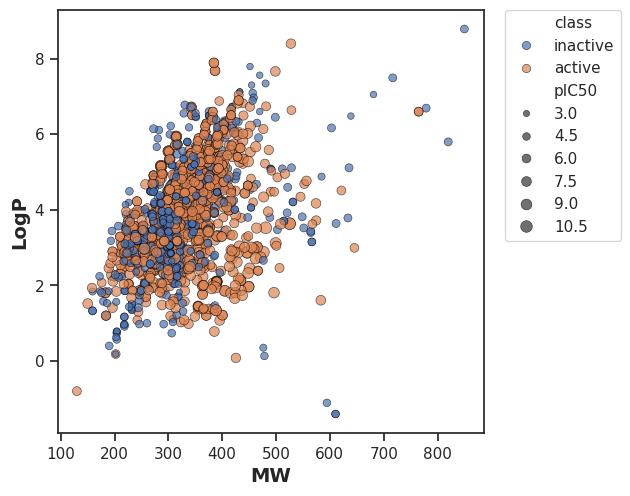

In [65]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

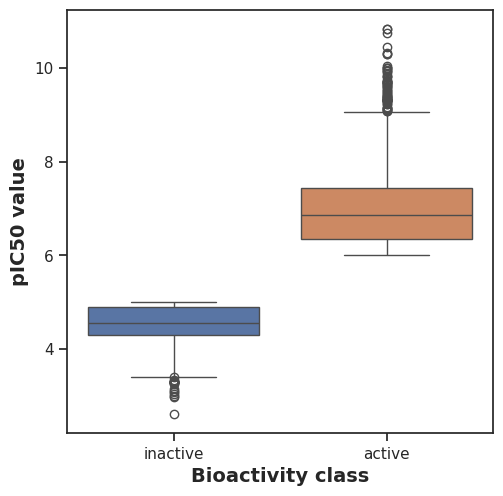

In [66]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class, hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [67]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [68]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,753368.0,4.040304e-269,0.05,Different distribution (reject H0)


#### **MW**

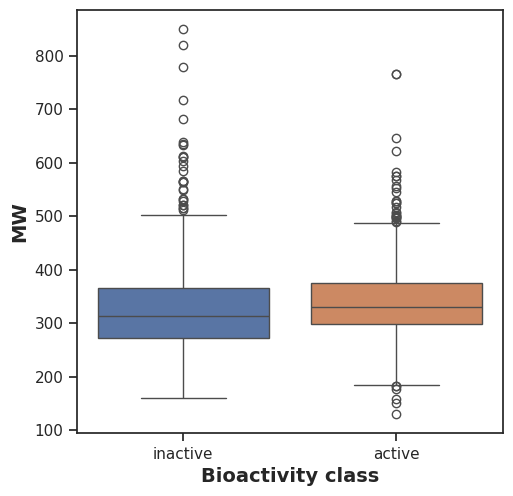

In [69]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class, hue= 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [70]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,431584.0,3.256647e-07,0.05,Different distribution (reject H0)


#### **LogP**

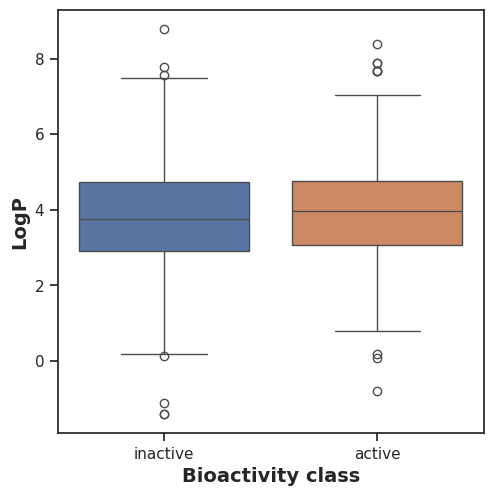

In [71]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class, hue= 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [72]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,399519.0,0.033623,0.05,Different distribution (reject H0)


#### **NumHDonors**

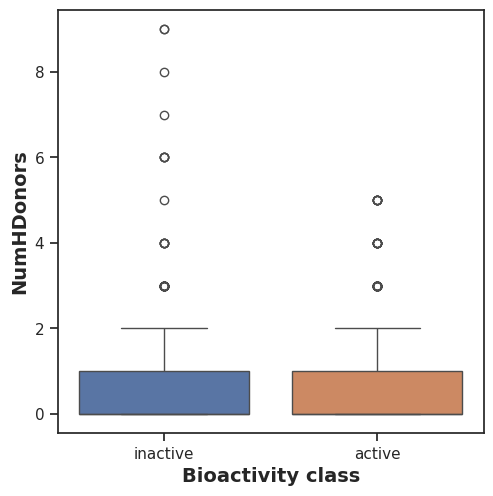

In [73]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class, hue= 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [74]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,331297.5,0.000001,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

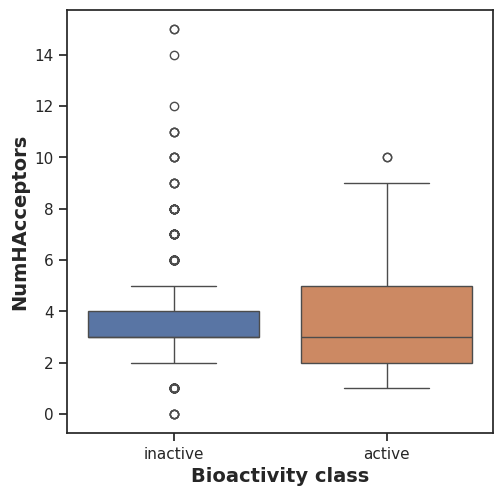

In [75]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class, hue= 'class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [76]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,398855.0,0.035496,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

In [77]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_MW.pdf (deflated 37%)
  adding: aromatase_05_bioactivity_data_2class_pIC50.csv (deflated 77%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: mannwhitneyu_MW.csv (deflated 7%)
  adding: aromatase_03_bioactivity_data_curated.csv (deflated 82%)
  adding: aromatase_04_bioactivity_data_3class_pIC50.csv (deflated 77%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
